0


/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/range.py:720: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return super().__getitem__(key)
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2019: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


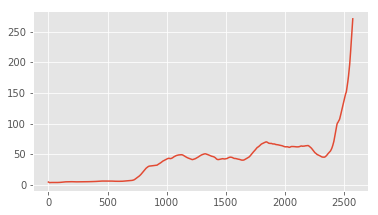

         Date      TSLA
0  2010-06-29  4.778000
1  2010-06-30  4.772000
2  2010-07-01  4.645333
3  2010-07-02  4.444000
4  2010-07-06  4.199600


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import pickle
from sklearn import preprocessing


def compile_data():
    #with open("sp500tickers.pickle","rb") as f:
    #    tickers = pickle.load(f)
    tickers = ["TSLA"]
    main_df = pd.DataFrame()
    style.use('ggplot')
    ax1 = plt.subplot2grid((6, 1), (0, 0), rowspan=5, colspan=1)
    for count, ticker in enumerate(tickers):
        try:
            df = pd.read_csv('stock_dfs/{}.csv'.format(ticker))


            df[ticker] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
            df['Date'] = df['Date']


            #df["Normalized"] = df.div(df[ticker].sum(axis=1), axis=0)

            df.drop(['Open', 'High', 'Low', "Close", "Volume", "Adj Close"], 1, inplace=True)

            ax1.plot(df.index, df[ticker])

            if main_df.empty:
                main_df= df
            else:
                main_df = main_df.join(df, how='outer')

            if count%10==0:
                print(count)
        except:
            continue
    plt.show()
    print(main_df.head())
    main_df.to_csv('TSLA_joined_closes.csv')

compile_data()